In [1]:
from datetime import datetime, timedelta, date
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from constants import *
from pandas_tools import multi_index_add as add
from animated_vaccinations import *
from vaccination import *

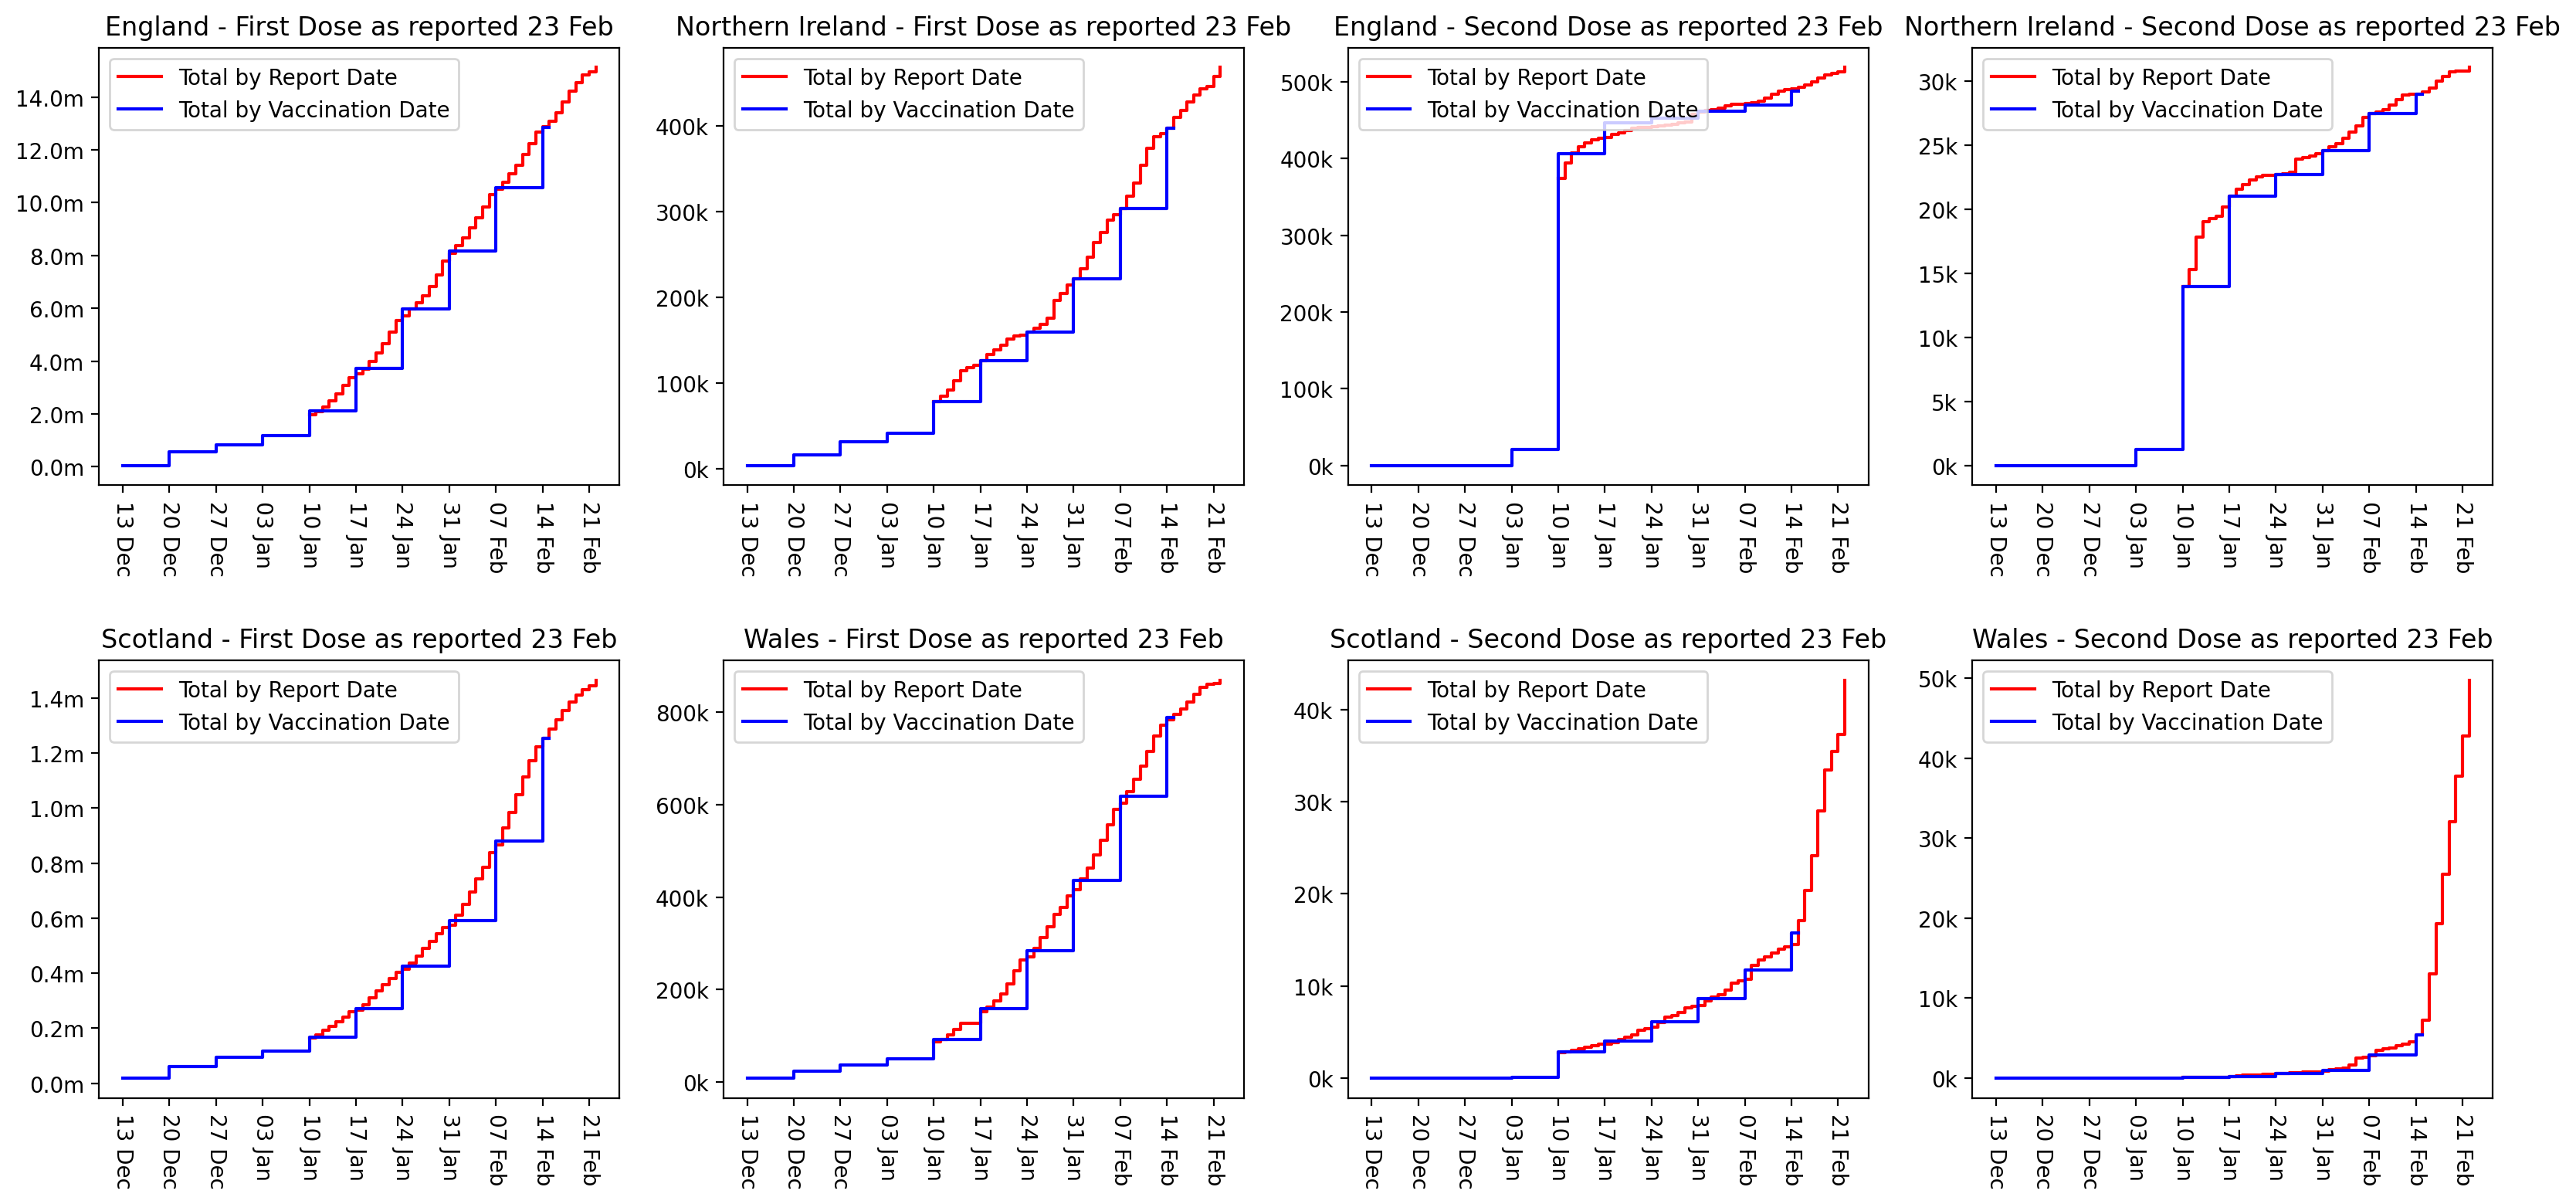

In [2]:
render_plots(selection_mapping()['everything'])

In [3]:
raw, data_date = raw_vaccination_data()
not_complete = ~raw.columns.str.contains('Complete')
by_publish_metrics = raw.columns[raw.columns.str.contains('ByPublishDate') & not_complete]
by_vaccination_metrics = raw.columns[
    raw.columns.str.contains('ByVaccinationDate') & raw.columns.str.startswith('cum') & not_complete
]
metrics = by_publish_metrics.union(by_vaccination_metrics)

In [4]:
pivoted = raw.pivot(index=date_col, columns=area_name, values=metrics)
by_vaccination_index = pivoted[by_vaccination_metrics].dropna(axis='rows', how='all').index
interesting_index = by_vaccination_index.union(by_vaccination_index+timedelta(days=1))
filled = pivoted.fillna(method='ffill')
interesting = filled.loc[filled.index.intersection(interesting_index)].dropna(
    axis='rows', how='all', subset=product(by_publish_metrics, filled.columns.levels[1])
)
add(interesting, 'calc_first', interesting[first_dose_daily_cum] - interesting[first_dose_weekly_cum])
add(interesting, 'calc_second', interesting[second_dose_daily_cum] - interesting[second_dose_weekly_cum])
interesting.columns = interesting.columns.swaplevel()
for area in interesting.columns.levels[0]:
    ordered = interesting[area][[
        first_dose_daily_cum, first_dose_weekly_cum, 'calc_first', first_dose_daily_new,
        second_dose_daily_cum, second_dose_weekly_cum, 'calc_second', second_dose_daily_new,
    ]]
    ordered.index.name=''
    ordered.rename(inplace=True, columns={
        first_dose_daily_cum: '1st Dose (Daily)',
        first_dose_weekly_cum: '1st Dose (Weekly)',
        'calc_first': '+/-',
        first_dose_daily_new: '1st Dose (New)',
        second_dose_daily_cum: '2nd Dose (Daily)',
        second_dose_weekly_cum: '2nd Dose (Weekly)',
        'calc_second': '+/-',
        second_dose_daily_new: '2nd Dose (New)',
    })
    display(f'For {area}:', ordered)

'For England:'

,1st Dose (Daily),1st Dose (Weekly),+/-,1st Dose (New),2nd Dose (Daily),2nd Dose (Weekly),+/-,2nd Dose (New)
,,,,,,,,
2021-01-10,1959151.0,2124665.0,-165514.0,NaN,374613.0,406129.0,-31516.0,NaN
2021-01-11,2080280.0,2124665.0,-44385.0,121129.0,393925.0,406129.0,-12204.0,19312.0
2021-01-17,3520056.0,3732909.0,-212853.0,154564.0,427386.0,446612.0,-19226.0,1284.0
2021-01-18,3687206.0,3732909.0,-45703.0,167150.0,431136.0,446612.0,-15476.0,3750.0
2021-01-24,5727693.0,5977796.0,-250103.0,198592.0,441684.0,453139.0,-11455.0,610.0
2021-01-25,5962544.0,5977796.0,-15252.0,234851.0,443010.0,453139.0,-10129.0,1326.0
2021-01-31,8082355.0,8175910.0,-93555.0,289359.0,460907.0,461605.0,-698.0,2757.0
2021-02-01,8362868.0,8175910.0,186958.0,280513.0,462503.0,461605.0,898.0,1596.0
2021-02-07,10519729.0,10574070.0,-54341.0,229514.0,471636.0,470176.0,1460.0,312.0


'For Northern Ireland:'

,1st Dose (Daily),1st Dose (Weekly),+/-,1st Dose (New),2nd Dose (Daily),2nd Dose (Weekly),+/-,2nd Dose (New)
,,,,,,,,
2021-01-10,78005.0,78005.0,0.0,NaN,13949.0,13949.0,0.0,NaN
2021-01-11,84187.0,78005.0,6182.0,6182.0,15288.0,13949.0,1339.0,1339.0
2021-01-17,125717.0,125717.0,0.0,5330.0,21016.0,21016.0,0.0,842.0
2021-01-18,132857.0,125717.0,7140.0,7140.0,21579.0,21016.0,563.0,563.0
2021-01-24,159642.0,159642.0,0.0,3998.0,22713.0,22713.0,0.0,26.0
2021-01-25,163317.0,159642.0,3675.0,3675.0,22795.0,22713.0,82.0,82.0
2021-01-31,221809.0,221809.0,0.0,7208.0,24612.0,24612.0,0.0,289.0
2021-02-01,233429.0,221809.0,11620.0,11620.0,24882.0,24612.0,270.0,270.0
2021-02-07,303478.0,303478.0,0.0,7563.0,27463.0,27463.0,0.0,256.0


'For Scotland:'

,1st Dose (Daily),1st Dose (Weekly),+/-,1st Dose (New),2nd Dose (Daily),2nd Dose (Weekly),+/-,2nd Dose (New)
,,,,,,,,
2021-01-10,163377.0,167091.0,-3714.0,NaN,2758.0,2868.0,-110.0,NaN
2021-01-11,175942.0,167091.0,8851.0,12565.0,2857.0,2868.0,-11.0,99.0
2021-01-17,264991.0,271569.0,-6578.0,4851.0,3698.0,4004.0,-306.0,41.0
2021-01-18,284582.0,271569.0,13013.0,19591.0,3886.0,4004.0,-118.0,188.0
2021-01-24,415402.0,425134.0,-9732.0,11364.0,5538.0,6087.0,-549.0,155.0
2021-01-25,437900.0,425134.0,12766.0,22498.0,6060.0,6087.0,-27.0,522.0
2021-01-31,575897.0,591910.0,-16013.0,9628.0,7849.0,8613.0,-764.0,55.0
2021-02-01,610778.0,591910.0,18868.0,34881.0,8345.0,8613.0,-268.0,496.0
2021-02-07,866823.0,881205.0,-14382.0,27557.0,10690.0,11734.0,-1044.0,108.0


'For Wales:'

,1st Dose (Daily),1st Dose (Weekly),+/-,1st Dose (New),2nd Dose (Daily),2nd Dose (Weekly),+/-,2nd Dose (New)
,,,,,,,,
2021-01-10,86039.0,91868.0,-5829.0,NaN,79.0,88.0,-9.0,NaN
2021-01-11,91239.0,91868.0,-629.0,5200.0,97.0,88.0,9.0,18.0
2021-01-17,151737.0,159299.0,-7562.0,25362.0,201.0,204.0,-3.0,72.0
2021-01-18,161932.0,159299.0,2633.0,10195.0,265.0,204.0,61.0,64.0
2021-01-24,270833.0,284323.0,-13490.0,6295.0,543.0,602.0,-59.0,27.0
2021-01-25,289566.0,284323.0,5243.0,18733.0,581.0,602.0,-21.0,38.0
2021-01-31,416306.0,436598.0,-20292.0,12843.0,841.0,1002.0,-161.0,55.0
2021-02-01,439640.0,436598.0,3042.0,23334.0,1066.0,1002.0,64.0,225.0
2021-02-07,603976.0,618193.0,-14217.0,14354.0,2792.0,2925.0,-133.0,186.0


In [5]:
for dt in pd.date_range(earliest_vaccination, date.today()-timedelta(days=1)):
    changes = vaccination_changes(dt, exclude_okay=True)
    if changes:
        display(changes)

,,First Dose (Total),Second Dose (Total)
,,,
England,10 Jan 21,"+1,959,151","+374,613"
Northern Ireland,10 Jan 21,"+78,005","+13,949"
Scotland,10 Jan 21,"+163,377","+2,758"
Wales,10 Jan 21,"+86,039",+79


,,First Dose (New),First Dose (Total)
,,,
Northern Ireland,16 Jan 21,"-20,172","-20,172"


,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
Northern Ireland,06 Feb 21,+730,+272,+272,+730,+272,+272


,,Second Dose (New),Complete (New)
,,,
Northern Ireland,21 Feb 21,-11,-11
